In [7]:
import os
import cv2
import albumentations as A
import matplotlib.pyplot as plt
from tqdm import tqdm

# Paths
image_dir = "../dataset/medellin/images/train"
label_dir = "../dataset/medellin/labels/train"
aug_img_dir = "../dataset/medellin/images/train"
aug_lbl_dir = "../dataset/medellin/labels/train"

transform = A.Compose([
    A.RandomBrightnessContrast(p=0.7),
    A.MotionBlur(blur_limit=3, p=0.4),
    A.Rotate(limit=15, p=0.5),
    A.RandomScale(scale_limit=0.3, p=0.5),
    A.Perspective(scale=(0.05, 0.1), p=0.4),
    A.HorizontalFlip(p=0.5),
    A.RandomSizedBBoxSafeCrop(height=640, width=640, p=0.3),
    A.ColorJitter(p=0.3)
], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))

# Número de augmentations por imagen
N = 30

In [ ]:
# imagenes que al hacer el aumento su bounding box se sale de la imagen sera excluido del aumento de datos
for filename in tqdm(os.listdir(image_dir)):
    if not filename.endswith(".jpg"):
        continue

    base_name = os.path.splitext(filename)[0]
    img_path = os.path.join(image_dir, filename)
    label_path = os.path.join(label_dir, base_name + ".txt")

    try:
        # Leer imagen
        image = cv2.imread(img_path)
        h, w = image.shape[:2]

        # Leer anotaciones en formato YOLO
        bboxes = []
        class_labels = []
        with open(label_path, "r") as f:
            for line in f:
                parts = line.strip().split()
                cls = int(parts[0])
                x, y, bw, bh = map(float, parts[1:])
                bboxes.append([x, y, bw, bh])
                class_labels.append(cls)

        for i in range(N):
            try:
                transformed = transform(image=image, bboxes=bboxes, class_labels=class_labels)

                aug_img = transformed["image"]
                aug_bboxes = transformed["bboxes"]
                aug_labels = transformed["class_labels"]

                # Guardar imagen
                out_img_name = f"{base_name}_aug_{i}.jpg"
                out_img_path = os.path.join(aug_img_dir, out_img_name)
                cv2.imwrite(out_img_path, aug_img)

                # Guardar anotaciones
                out_lbl_path = os.path.join(aug_lbl_dir, f"{base_name}_aug_{i}.txt")
                with open(out_lbl_path, "w") as f:
                    for box, cls in zip(aug_bboxes, aug_labels):
                        f.write(f"{int(cls)} {' '.join(f'{coord:.6f}' for coord in box)}\n")
            except ValueError as e:
                print(f"Error processing augmentation {i} for image {filename}: {e}")

    except Exception as e:
        print(f"Error processing image {filename}: {e}")

 16%|█▌        | 14/88 [00:05<00:25,  2.85it/s]

Error processing augmentation 0 for image frame_0049.jpg: Expected x_min for bbox [-1.9967556e-06  6.0581899e-01  6.4732000e-02  7.3942101e-01
  1.0000000e+00] to be in the range [0.0, 1.0], got -1.996755599975586e-06.
Error processing augmentation 1 for image frame_0049.jpg: Expected x_min for bbox [-1.9967556e-06  6.0581899e-01  6.4732000e-02  7.3942101e-01
  1.0000000e+00] to be in the range [0.0, 1.0], got -1.996755599975586e-06.
Error processing augmentation 2 for image frame_0049.jpg: Expected x_min for bbox [-1.9967556e-06  6.0581899e-01  6.4732000e-02  7.3942101e-01
  1.0000000e+00] to be in the range [0.0, 1.0], got -1.996755599975586e-06.
Error processing augmentation 3 for image frame_0049.jpg: Expected x_min for bbox [-1.9967556e-06  6.0581899e-01  6.4732000e-02  7.3942101e-01
  1.0000000e+00] to be in the range [0.0, 1.0], got -1.996755599975586e-06.
Error processing augmentation 4 for image frame_0049.jpg: Expected x_min for bbox [-1.9967556e-06  6.0581899e-01  6.4732000e

 62%|██████▎   | 55/88 [00:19<00:12,  2.63it/s]

Error processing augmentation 0 for image frame_0109.jpg: Expected x_min for bbox [-2.4996698e-06  6.4689851e-01  6.0242500e-02  7.5830555e-01
  1.0000000e+00] to be in the range [0.0, 1.0], got -2.4996697902679443e-06.
Error processing augmentation 1 for image frame_0109.jpg: Expected x_min for bbox [-2.4996698e-06  6.4689851e-01  6.0242500e-02  7.5830555e-01
  1.0000000e+00] to be in the range [0.0, 1.0], got -2.4996697902679443e-06.
Error processing augmentation 2 for image frame_0109.jpg: Expected x_min for bbox [-2.4996698e-06  6.4689851e-01  6.0242500e-02  7.5830555e-01
  1.0000000e+00] to be in the range [0.0, 1.0], got -2.4996697902679443e-06.
Error processing augmentation 3 for image frame_0109.jpg: Expected x_min for bbox [-2.4996698e-06  6.4689851e-01  6.0242500e-02  7.5830555e-01
  1.0000000e+00] to be in the range [0.0, 1.0], got -2.4996697902679443e-06.
Error processing augmentation 4 for image frame_0109.jpg: Expected x_min for bbox [-2.4996698e-06  6.4689851e-01  6.0242

 65%|██████▍   | 57/88 [00:19<00:08,  3.51it/s]

Error processing augmentation 0 for image frame_0111.jpg: Expected x_min for bbox [-2.9988587e-06  5.0396752e-01  4.7617000e-02  6.1905050e-01
  1.0000000e+00] to be in the range [0.0, 1.0], got -2.998858690261841e-06.
Error processing augmentation 1 for image frame_0111.jpg: Expected x_min for bbox [-2.9988587e-06  5.0396752e-01  4.7617000e-02  6.1905050e-01
  1.0000000e+00] to be in the range [0.0, 1.0], got -2.998858690261841e-06.
Error processing augmentation 2 for image frame_0111.jpg: Expected x_min for bbox [-2.9988587e-06  5.0396752e-01  4.7617000e-02  6.1905050e-01
  1.0000000e+00] to be in the range [0.0, 1.0], got -2.998858690261841e-06.
Error processing augmentation 3 for image frame_0111.jpg: Expected x_min for bbox [-2.9988587e-06  5.0396752e-01  4.7617000e-02  6.1905050e-01
  1.0000000e+00] to be in the range [0.0, 1.0], got -2.998858690261841e-06.
Error processing augmentation 4 for image frame_0111.jpg: Expected x_min for bbox [-2.9988587e-06  5.0396752e-01  4.7617000e

 76%|███████▌  | 67/88 [00:23<00:08,  2.48it/s]

Error processing augmentation 0 for image frame_0127.jpg: Expected y_min for bbox [ 7.6879203e-01 -4.5001507e-06  8.1943798e-01  8.1504501e-02
  1.0000000e+00] to be in the range [0.0, 1.0], got -4.500150680541992e-06.
Error processing augmentation 1 for image frame_0127.jpg: Expected y_min for bbox [ 7.6879203e-01 -4.5001507e-06  8.1943798e-01  8.1504501e-02
  1.0000000e+00] to be in the range [0.0, 1.0], got -4.500150680541992e-06.
Error processing augmentation 2 for image frame_0127.jpg: Expected y_min for bbox [ 7.6879203e-01 -4.5001507e-06  8.1943798e-01  8.1504501e-02
  1.0000000e+00] to be in the range [0.0, 1.0], got -4.500150680541992e-06.
Error processing augmentation 3 for image frame_0127.jpg: Expected y_min for bbox [ 7.6879203e-01 -4.5001507e-06  8.1943798e-01  8.1504501e-02
  1.0000000e+00] to be in the range [0.0, 1.0], got -4.500150680541992e-06.
Error processing augmentation 4 for image frame_0127.jpg: Expected y_min for bbox [ 7.6879203e-01 -4.5001507e-06  8.1943798e

 98%|█████████▊| 86/88 [00:30<00:00,  2.80it/s]

Error processing augmentation 0 for image frame_0151.jpg: Expected x_min for bbox [-2.4996698e-06  3.4934300e-01  3.1252500e-02  4.6006501e-01
  1.0000000e+00] to be in the range [0.0, 1.0], got -2.4996697902679443e-06.
Error processing augmentation 1 for image frame_0151.jpg: Expected x_min for bbox [-2.4996698e-06  3.4934300e-01  3.1252500e-02  4.6006501e-01
  1.0000000e+00] to be in the range [0.0, 1.0], got -2.4996697902679443e-06.
Error processing augmentation 2 for image frame_0151.jpg: Expected x_min for bbox [-2.4996698e-06  3.4934300e-01  3.1252500e-02  4.6006501e-01
  1.0000000e+00] to be in the range [0.0, 1.0], got -2.4996697902679443e-06.
Error processing augmentation 3 for image frame_0151.jpg: Expected x_min for bbox [-2.4996698e-06  3.4934300e-01  3.1252500e-02  4.6006501e-01
  1.0000000e+00] to be in the range [0.0, 1.0], got -2.4996697902679443e-06.
Error processing augmentation 4 for image frame_0151.jpg: Expected x_min for bbox [-2.4996698e-06  3.4934300e-01  3.1252

100%|██████████| 88/88 [00:31<00:00,  2.84it/s]


In [5]:
#testeando labels en data augmentation
def draw_boxes(image_file, label_file):
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    h, w, _ = image.shape

    if os.path.exists(label_file):
        with open(label_file, 'r') as f:
            for line in f.readlines():
                parts = line.strip().split()
                class_id = int(parts[0])
                x_center, y_center, bw, bh = map(float, parts[1:])

                # Convertir a coordenadas de esquina
                x1 = int((x_center - bw / 2) * w)
                y1 = int((y_center - bh / 2) * h)
                x2 = int((x_center + bw / 2) * w)
                y2 = int((y_center + bh / 2) * h)

                # Dibujar rectángulo
                cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(image, str(class_id), (x1, y1 - 5),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # Mostrar imagen
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

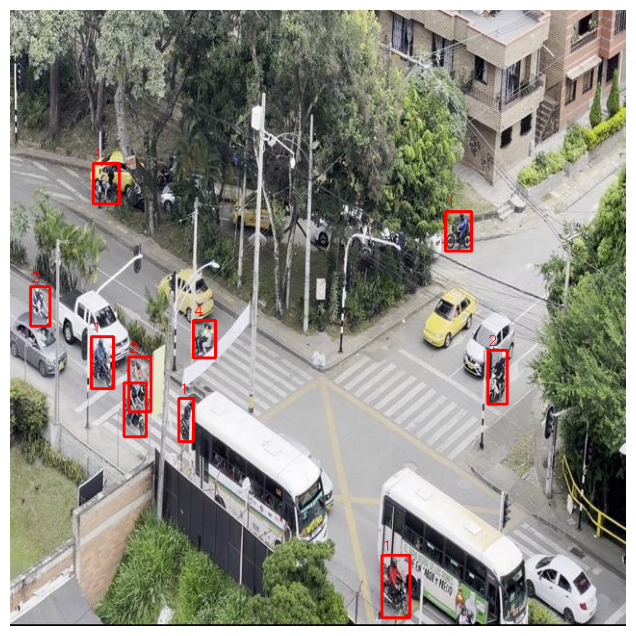

In [8]:
image_dir = "../dataset/medellin/images/train"
label_dir = "../dataset/medellin/labels/train"
filename ='frame_0006_aug_27.jpg'
image_file = os.path.join(image_dir, filename)
label_file = os.path.join(label_dir, os.path.splitext(filename)[0] + ".txt")
draw_boxes(image_file, label_file)